In [ ]:
# Importing the Libraries which are needed.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Dataset

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns = {'Genre':'Gender'},inplace = True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Shape of Dataset
df.shape

(200, 5)

In [ ]:
#Datatype of All Attributes
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
# To check whether your dataset have any null value or not

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#Drop the ID Column
df = pd.read_csv("Mall_Customers.csv",index_col=1)
df = df.drop('CustomerID',axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
Male,19,15,39
Male,21,15,81
Female,20,16,6
Female,23,16,77
Female,31,17,40


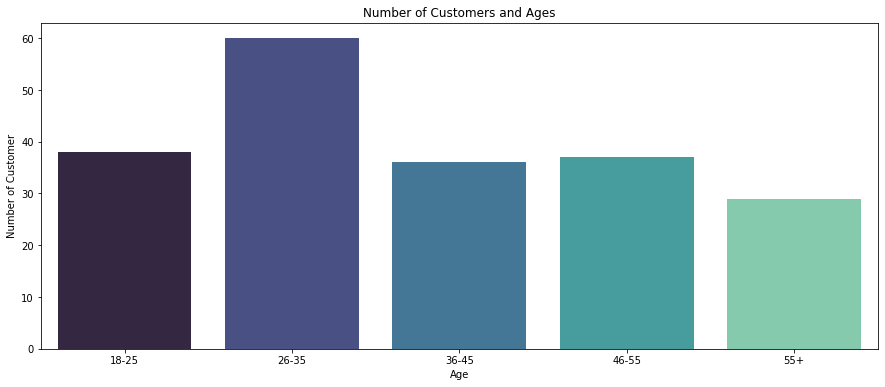

In [ ]:
#Divide the Age in diffrent ranges to understand which Age group's Customers are more.

age_18_25 = df.Age[(df.Age >=18) & (df.Age <=25)]
age_26_35 = df.Age[(df.Age >=26) & (df.Age <=35)]
age_36_45 = df.Age[(df.Age >=36) & (df.Age <=45)]
age_46_55 = df.Age[(df.Age >=46) & (df.Age <=55)]
age_56Above = df.Age[(df.Age >=56)]

agex = ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_56Above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette = "mako")
plt.title("Number of Customers and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


**Customers between the age group 26 to 35 are more**

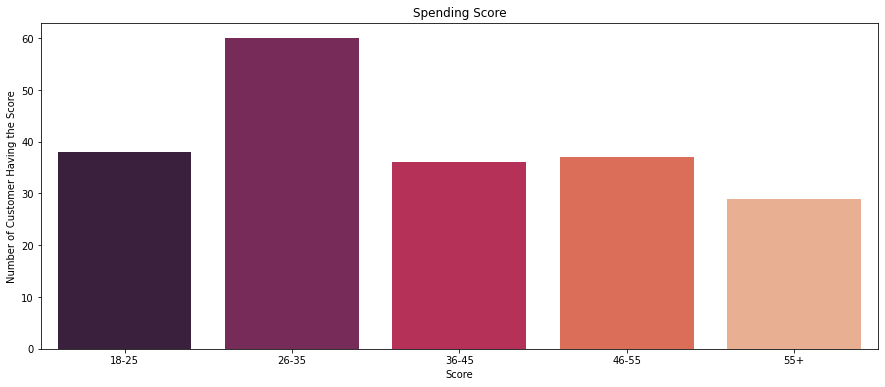

In [ ]:
#Divide the Spending Score of Customers

ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=1) & (df["Spending Score (1-100)"] <=20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=21) & (df["Spending Score (1-100)"] <=40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=41) & (df["Spending Score (1-100)"] <=60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=61) & (df["Spending Score (1-100)"] <=80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=81) & (df["Spending Score (1-100)"] <=100)]
                                          
ssx = ["1-20","21-40","41-60","61-80","81-100"]
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette = "rocket")
plt.title("Spending Score")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()



**Maximum customers have the score between 26 - 35**

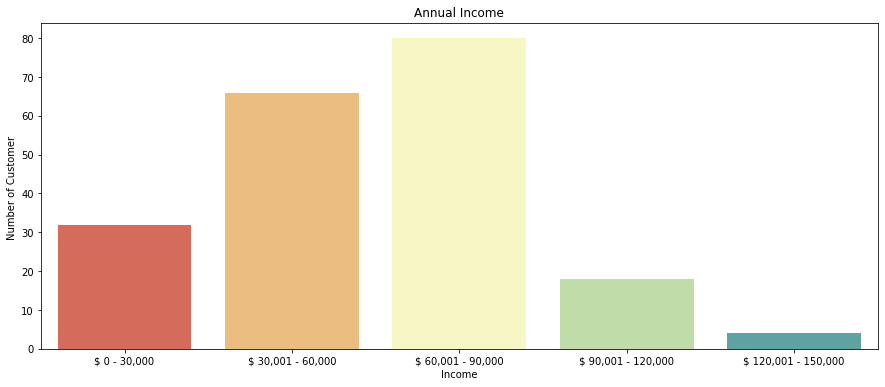

In [ ]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >=0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >=31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >=61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >=91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >=121) & (df["Annual Income (k$)"] <= 150)] 

aix = ["$ 0 - 30,000","$ 30,001 - 60,000","$ 60,001 - 90,000","$ 90,001 - 120,000","$ 120,001 - 150,000"]     
aiy = [len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]      

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette = "Spectral")
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("Number of Customer ")
plt.show()


**80% Customers have the income in between 60,000 to 90,000**

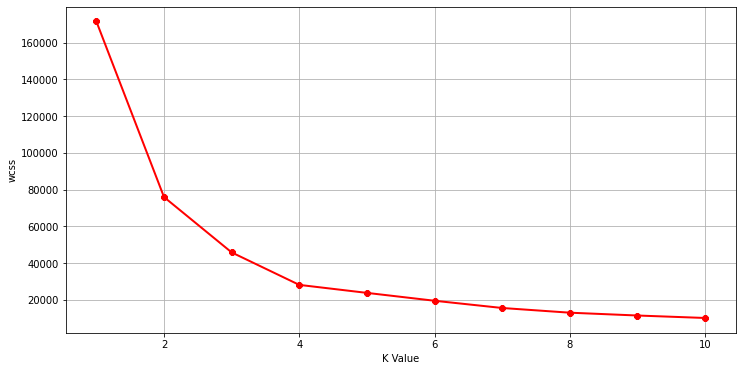

In [ ]:
X1 = df.loc[:, ["Age","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth = 2, color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

In [ ]:
#Number of clusters we want to create
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

[2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 2 2 3 1 2 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3
 1 3 1 0 1 0 2 3 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 1 2 1 0 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 0 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [ ]:
#Centroinds
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]]


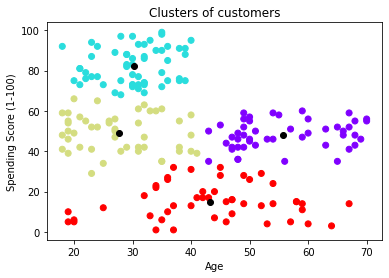

In [ ]:
#Visualize clusters on graph

plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],color ='black')
plt.title("Clusters of customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

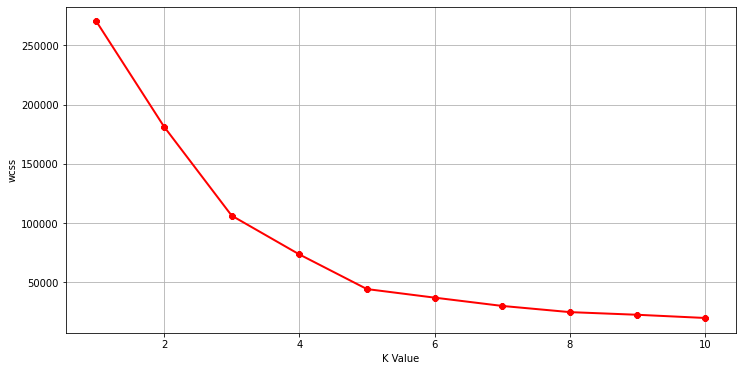

In [ ]:
X2 = df.loc[:, ["Annual Income (k$)","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth = 2, color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

In [ ]:
#Number of clusters we want to create
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X2)
print(label)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [ ]:
#Centroinds
print(kmeans.cluster_centers_)

[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [87.         18.63157895]
 [48.26       56.48      ]]


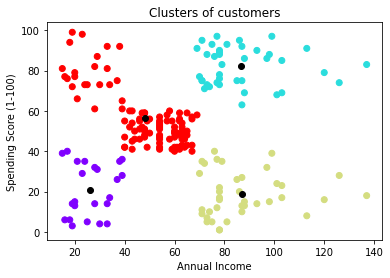

In [ ]:
#Visualize clusters on graph

plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],color ='black')
plt.title("Clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (1-100)")
plt.show()